**Ex 1)**

Because the µ = 0 and covariance matrix Σ = I, we get a multivariative vector of dimension d by sampling d normally distributed random numbers.

In [ ]:
# Code to generate normally distributed random numbers from Worksheet 1 solution

# Create sample list with random numbers following the normal distribution
import numpy as np

seed = 2**25
seed2 = 2001

# unused
"""
def rand_standard_distribution(mean=0.0, std=1.0):
  x = rand_between_0_1()
  return (1 / (std * np.sqrt(2 * np.pi))) * (np.e ** (-(1/2) * (((x - mean) / std))**2))
def rand_between_0_1_after_standard_dist():
  return rand_standard_distribution(seed)
"""

def rand_between_0_1():
  global seed
  # Create 2 indepented uniformly distributed number between 0.0 and 1.0
  # From numerical recipes
  a = 1664525
  b = 1013904223
  m = 2**32
  Z = (a * seed + b) % m
  seed = Z # important: override the global seed
  return Z / m # important: to get a float value between 0 and 1

def rand_between_0_1_seed2():
  global seed2
  # Create 2 indepented uniformly distributed number between 0.0 and 1.0
  # From numerical recipes
  a = 1664525
  b = 1013904223
  m = 2**32
  Z = (a * seed2 + b) % m
  seed2 = Z # important: override the global seed2
  return Z / m # important: to get a float value between 0 and 1

def normal_random_number():
  # Indepent u
  u1 = rand_between_0_1()
  u2 = rand_between_0_1_seed2()
  # get random numbers following the normal distribution
  z1 = np.cos(2* np.pi * u1) * np.sqrt(-2 * np.log(u2))
  return z1

In [ ]:
dimensions = [2, 5, 10]
sizes = [10, 100, 1000]

# generate a normally distributed random vector of dimension dimension
def random_vector_generator(dimension):
  vector = []
  for i in range(dimension):
    vector.append(normal_random_number())
  return np.array(vector)

print(random_vector_generator(2))



[-1.56263063 -0.57792262]


In [ ]:
def mean_estimate(samples):
  n_samples, n_dimensions = samples.shape
  return np.mean(samples, axis=0)

def covariance_estimate(samples):
  n_samples, n_dimensions = samples.shape
  mean = mean_estimate(samples)
  covariance = np.zeros((n_dimensions, n_dimensions))
  for i in range(n_samples):
      covariance += (samples[i] - mean).reshape((-1,1)) * (samples[i] - mean).reshape((1,-1))
  covariance /= n_samples
  return covariance

# validate the estimated parameters
def validation(dimensions, size):
  for d in dimensions:
    vectors = []
    for i in range(size):
      vectors.append(random_vector_generator(d))

    sample_mean = mean_estimate(np.array(vectors))
    sample_cov = covariance_estimate(np.array(vectors))

    # compute true mean and covariance matrix
    true_mean = np.zeros(d)
    true_cov = np.identity(d)
    # compute MSE of parameter estimates
    mean_mse = np.mean((sample_mean - true_mean)**2)
    cov_mse = np.mean((sample_cov - true_cov)**2)

    # print results
    print(f"Sample set size: {size}, Dimension: {d}")
    print(f"Estimated mean: \n{sample_mean}")
    print(f"True mean: \n {true_mean}")
    print(f"Mean MSE: {mean_mse}")
    print(f"Estimated covariance matrix: \n{sample_cov}")
    print(f"True covariance matrix: \n{true_cov}")
    print(f"Covariance matrix MSE: {cov_mse}")
    print()

def sample_set_size_study(dimensions, sizes):
  for s in sizes:
    validation(dimensions, s)

sample_set_size_study(dimensions, sizes)


Sample set size: 10, Dimension: 2
Estimated mean: 
[0.09912662 0.39668162]
True mean: 
 [0. 0.]
Mean MSE: 0.0835911963762192
Estimated covariance matrix: 
[[0.35559796 0.25127093]
 [0.25127093 0.83001832]]
True covariance matrix: 
[[1. 0.]
 [0. 1.]]
Covariance matrix MSE: 0.14260548105546372

Sample set size: 10, Dimension: 5
Estimated mean: 
[ 0.04242424  0.16258753 -0.20501169 -0.1454432   0.22578851]
True mean: 
 [0. 0. 0. 0. 0.]
Mean MSE: 0.02847969776731981
Estimated covariance matrix: 
[[ 1.34577543  0.06483323 -0.04003977  0.08596539 -0.01015394]
 [ 0.06483323  0.71523397 -0.18687261  0.22484735  0.4770102 ]
 [-0.04003977 -0.18687261  0.6870667   0.10791936 -0.17414884]
 [ 0.08596539  0.22484735  0.10791936  0.60380933  0.29663691]
 [-0.01015394  0.4770102  -0.17414884  0.29663691  0.75116609]]
True covariance matrix: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Covariance matrix MSE: 0.057201315707774605

Sample set size: 10, Dimen

For mean vectors µ ̸= 0 and covariance matrices Σ ̸= I, we need the Cholesky Decomposition

In [ ]:
# sample sizes to use
means = [[1,2],[1,2,3,4,5]]
covariances = [
      [[0.2, 0.3],
       [0.1, 0.2]],

       [[1, 0.5, 0.3, 0.2, 0.1],
       [0.5, 1, 0.4, 0.3, 0.2],
       [0.3, 0.4, 1, 0.5, 0.4],
       [0.2, 0.3, 0.5, 1, 0.6],
       [0.1, 0.2, 0.4, 0.6, 1]]
]
dimensions = [2, 5]


def cholesky(A):
    n = len(A)
    L = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            s = sum(L[i][k] * L[j][k] for k in range(j))
            if (i == j):
                L[i][j] = np.sqrt(A[i][i] - s)
            else:
                L[i][j] = (1.0 / L[j][j] * (A[i][j] - s))
    return L

def generate_normal_vector_nonzero_mean_cov_cholesky(dim, mean, cov):
    # Compute Cholesky decomposition of covariance matrix
    L = cholesky(cov)
    # Generate random vector of standard normal variables
    z = np.random.normal(0, 1, dim)
    # Compute final random vector with desired mean and covariance
    x = mean + np.dot(L, z)
    return x


for d in dimensions:
    mean = means[dimensions.index(d)]
    cov = covariances[dimensions.index(d)]
    for size in sizes:
        # generate sample set of random vectors
        vectors = []
        for i in range(size):
            vectors.append(generate_normal_vector_nonzero_mean_cov_cholesky(d, mean, cov))

        sample_mean = mean_estimate(np.array(vectors))
        sample_cov = covariance_estimate(np.array(vectors))

        # compute true mean and covariance matrix
        true_mean = mean
        true_cov = cov

        # compute MSE of parameter estimates
        mean_mse = np.mean((sample_mean - true_mean)**2)
        cov_mse = np.mean((sample_cov - true_cov)**2)

        # print results
        print(f"Sample set size: {size}, Dimension: {d}")
        print(f"Estimated mean: {sample_mean}")
        print(f"True mean: {true_mean}")
        print(f"Mean MSE: {mean_mse}")
        print(f"Estimated covariance matrix: {sample_cov}")
        print(f"True covariance matrix: {true_cov}")
        print(f"Covariance matrix MSE: {cov_mse}")
        print()

Sample set size: 10, Dimension: 2
Estimated mean: [0.89079953 1.97248673]
True mean: [1, 2]
Mean MSE: 0.006340861232593027
Estimated covariance matrix: [[0.22053946 0.11575581]
 [0.11575581 0.22428283]]
True covariance matrix: [[0.2, 0.3], [0.1, 0.2]]
Covariance matrix MSE: 0.00880142329421762

Sample set size: 100, Dimension: 2
Estimated mean: [1.01298102 2.00426186]
True mean: [1, 2]
Mean MSE: 9.333509310030867e-05
Estimated covariance matrix: [[0.23714691 0.12723438]
 [0.12723438 0.25564905]]
True covariance matrix: [[0.2, 0.3], [0.1, 0.2]]
Covariance matrix MSE: 0.00876659519903719

Sample set size: 1000, Dimension: 2
Estimated mean: [0.99099244 1.98953582]
True mean: [1, 2]
Mean MSE: 9.531758407453912e-05
Estimated covariance matrix: [[0.1813758  0.08870026]
 [0.08870026 0.19359927]]
True covariance matrix: [[0.2, 0.3], [0.1, 0.2]]
Covariance matrix MSE: 0.011290773866527864

Sample set size: 10, Dimension: 5
Estimated mean: [1.42892608 2.1129155  3.51505027 4.58427344 5.53587911]

**Ex 2)**

Estimate Without Importance Sampling

In [ ]:
def estimate_count_without_importance_sampling(theta, N):
  count = 0
  for i in range(N):
    random_normal = np.random.normal(0, 1)
    if random_normal < theta:
      count = count + 1
  return count/N

Using Normal Distribution as proposal distribution

Estimation with importance less than theta -20: 3.0073530544719737e-05 / Estimation Without importance: 0.0
Estimation with importance less than theta -18: 0.00020882326575247844 / Estimation Without importance: 0.0
Estimation with importance less than theta -16: 0.0005353634387858845 / Estimation Without importance: 0.0
Estimation with importance less than theta -14: 0.0028366565409714394 / Estimation Without importance: 0.0
Estimation with importance less than theta -12: 0.008144261712303643 / Estimation Without importance: 0.0
Estimation with importance less than theta -10: 0.022420371920535018 / Estimation Without importance: 0.0
Estimation with importance less than theta -8: 0.05526510012823518 / Estimation Without importance: 0.0
Estimation with importance less than theta -6: 0.11423345423801033 / Estimation Without importance: 0.0
Estimation with importance less than theta -4: 0.21176907545605148 / Estimation Without importance: 7e-05
Estimation with importance less than theta -

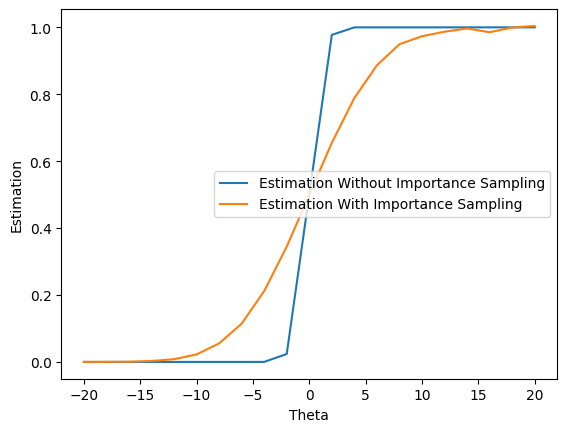

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

thetas = []
plot_without = []
plot_with = []

def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Use a normal distribution as a proposal distribution
def proposal_distribution(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

for theta in range(-20, 22, 2):
  samples_size = 100000 # Number of samples
  mu_target = 0  # mean of target distribution
  sigma_target = 1  # standard deviation of target distribution
  mu_proposal = 0  # mean of proposal distribution
  sigma_proposal = 5  # standard deviation of proposal distribution

  proposal_samples = np.random.normal(mu_proposal, sigma_proposal, samples_size)
  weights = target_distribution(proposal_samples) / proposal_distribution(proposal_samples, mu_proposal, sigma_proposal)

  estimate_without = estimate_count_without_importance_sampling(theta, samples_size)
  estimate_with = np.mean(proposal_samples < theta) * np.mean(weights)

  print("Estimation with importance less than theta {}: {} / Estimation Without importance: {}".format(theta, estimate_with, estimate_without))

  thetas.append(theta)
  plot_without.append(estimate_without)
  plot_with.append(estimate_with)

plt.plot(thetas, plot_without, label='Estimation Without Importance Sampling')
plt.plot(thetas, plot_with, label='Estimation With Importance Sampling')

# Add labels and legend
plt.xlabel('Theta')
plt.ylabel('Estimation')
plt.legend()

# Show the plot
plt.show()


Using Uniform Distribution as proposal distribution

Estimation with importance less than theta -20: 0.04599692458817604 / Estimation Without importance: 0.0
Estimation with importance less than theta -18: 0.09590592652480315 / Estimation Without importance: 0.0
Estimation with importance less than theta -16: 0.13147934530891767 / Estimation Without importance: 0.0
Estimation with importance less than theta -14: 0.1853282029368019 / Estimation Without importance: 0.0
Estimation with importance less than theta -12: 0.22811888124967158 / Estimation Without importance: 0.0
Estimation with importance less than theta -10: 0.28588844199198915 / Estimation Without importance: 0.0
Estimation with importance less than theta -8: 0.3143536256550077 / Estimation Without importance: 0.0
Estimation with importance less than theta -6: 0.3644114112690955 / Estimation Without importance: 0.0
Estimation with importance less than theta -4: 0.4108052509529725 / Estimation Without importance: 0.0001
Estimation with importance less than theta -2: 0.4279467347

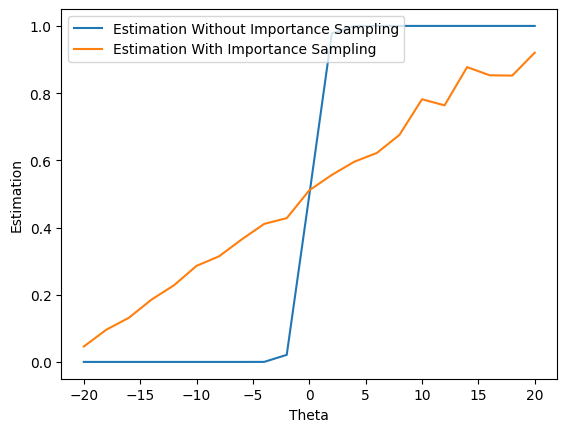

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

thetas = []
plot_without = []
plot_with = []

def target_distribution(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

# Use a normal distribution as a proposal distribution
def proposal_distribution(x, a):
    return 1 / (2 * a)

for theta in range(-20, 22, 2):
  samples_size = 10000
  width = 22  # Width of the uniform distribution

  proposal_samples = np.random.uniform(-width, width, samples_size)
  weights = target_distribution(proposal_samples) / proposal_distribution(proposal_samples, width)

  estimate_without = estimate_count_without_importance_sampling(theta, samples_size)
  estimate_with = np.mean(proposal_samples < theta) * np.mean(weights)

  print("Estimation with importance less than theta {}: {} / Estimation Without importance: {}".format(theta, estimate_with, estimate_without))

  thetas.append(theta)
  plot_without.append(estimate_without)
  plot_with.append(estimate_with)

plt.plot(thetas, plot_without, label='Estimation Without Importance Sampling')
plt.plot(thetas, plot_with, label='Estimation With Importance Sampling')

# Add labels and legend
plt.xlabel('Theta')
plt.ylabel('Estimation')
plt.legend()

# Show the plot
plt.show()


**Ex 3)**

In [ ]:
import numpy as np

# Uniformly distributed sample using random numbers
lower_bound = -0.5
upper_bound = 0.5
radius = 0.3
size = 1000
x = np.random.uniform(lower_bound, upper_bound, size)
y = np.random.uniform(lower_bound, upper_bound, size)

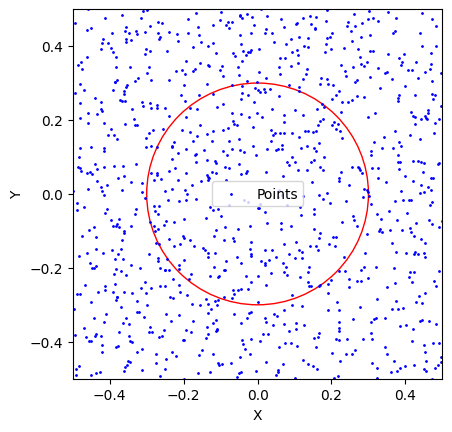

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define circle parameters
circle_center = (0, 0)

# Create figure and axes
fig, ax = plt.subplots()

# Plot the circle
circle = plt.Circle(circle_center, radius, fill=False, color='r')
ax.add_patch(circle)

# Plot the points
ax.scatter(x, y, s=1, color='b', label='Points')

# Set axis limits
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add legend
ax.legend()

# Set aspect ratio to 'equal'
ax.set_aspect('equal')

# Show the plot
plt.show()

In [ ]:
import math

def percentage_points_inside_circle(size, x, y, radius):
  counter = 0
  for i in range(size):
    if(math.sqrt(x[i]**2 + y[i]**2) < radius):
      counter = counter + 1
  return counter/size

estimated_area = percentage_points_inside_circle(size, x, y, radius)
actual_area = radius**2 * math.pi

print("The estimated area is {}". format(estimated_area))
print("The actual area is {}". format(actual_area))

The estimated area is 0.293
The actual area is 0.2827433388230814


In [ ]:
small_radius = 10^-10

estimated_area = percentage_points_inside_circle(size, x, y, small_radius)
actual_area = radius**2 * math.pi

print("The estimated area is {}". format(estimated_area))
print("The actual area is {}". format(actual_area))

The estimated area is 0.0
The actual area is 0.2827433388230814


In [ ]:
#Part C
# What happens to your estimation when r gets very small (e.g. r = 10−10)? Find a solution for
# the problem using Importance Sampling. Use and compare two dierent proposal distributions.
def GenerateDifferentDistribution(noOfSamples):

  # Set the radius of the circle
  radius = 1e-10

  # Set the side length of the square
  L = 2 * radius

  # Define the target distribution
  def target(x, y):
      return 1 if x**2 + y**2 <= radius**2 else 0

  # Define the first proposal distribution
  def proposal1(x, y):
      return 1 / L**2

  # Define the second proposal distribution
  def proposal2(x, y,):
      return 1 / (2 * radius)**2

  # Generate the random samples using the first proposal distribution
  samples1 = []
  weights1 = []
  for i in range(noOfSamples):
      # Generate a random uniform point in the square
      x = np.random.uniform(-radius, radius)
      y = np.random.uniform(-radius, radius)

      # Compute the weight
      weight = target(x, y) / proposal1(x, y)

      # Append the sample and weight
      samples1.append([x, y])
      weights1.append(weight)

  # Generate the random samples using the second proposal distribution
  samples2 = []
  weights2 = []
  for i in range(noOfSamples):
      # Generate a random normal point in the circle
      x = np.random.normal(-radius, radius)
      y = np.random.normal(-radius, radius)

      # Compute the weight
      weight = target(x, y) / proposal2(x, y)

      # Append the sample and weight
      samples2.append([x, y])
      weights2.append(weight)

  # Convert the samples to NumPy arrays
  samples1 = np.array(samples1)
  samples2 = np.array(samples2)

  # Estimate the area covered by the circle using the first proposal distribution
  area_estimate1 = np.sum(weights1) / len(weights1) * L**2

  # Estimate the area covered by the circle using the second proposal distribution
  area_estimate2 = np.sum(weights2) / len(weights2) * (2 * radius)**2

  # Print the area estimates
  print(f"Area estimate using first distribution 1: {area_estimate1}")
  print(f"Area estimate using second distribution 2: {area_estimate2}")

In [ ]:
GenerateDifferentDistribution(1000)

Area estimate using first distribution 1: 1.2559999999999997e-39
Area estimate using second distribution 2: 2.6880000000000005e-40


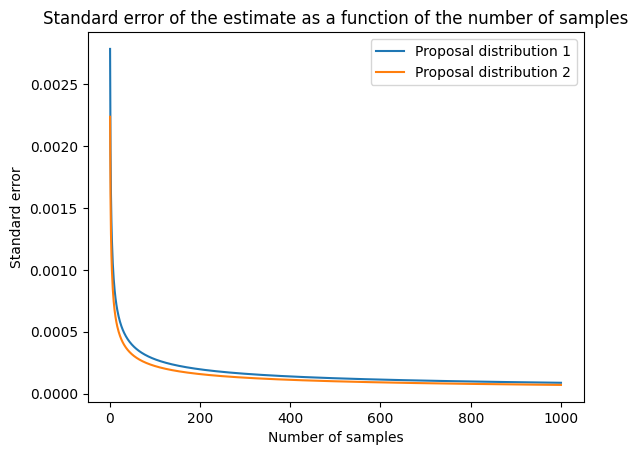

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the radius of the circle
r = 0.3

# Set the side length of the square
L = 2 * r

# Define the target distribution
def target(x, y):
    return 1 if x**2 + y**2 <= r**2 else 0

# Define the first proposal distribution
def proposal1(x, y):
    return 1 / L**2

# Define the second proposal distribution
def proposal2(x, y):
    return 1 / (2 * r)**2

# Define the function to estimate the area covered by the circle
def estimate_area(samples, weights, area_proposal):
    return np.sum(weights) / len(weights) * area_proposal

# Generate the random samples using the first proposal distribution
samples1 = []
weights1 = []
areas1 = []
for i in range(1, 1001):
    # Generate a random point in the square
    x = np.random.uniform(-r, r)
    y = np.random.uniform(-r, r)

    # Compute the weight
    weight = target(x, y) / proposal1(x, y)

    # Append the sample and weight
    samples1.append([x, y])
    weights1.append(weight)

    # Estimate the area covered by the circle
    area_estimate = estimate_area(samples1, weights1, L**2)
    areas1.append(area_estimate)

# Generate the random samples using the second proposal distribution
samples2 = []
weights2 = []
areas2 = []
for i in range(1, 1001):
    # Generate a random point in the circle
    x = np.random.uniform(-r, r)
    y = np.random.uniform(-r, r)

    # Compute the weight
    weight = target(x, y) / proposal2(x, y)

    # Append the sample and weight
    samples2.append([x, y])
    weights2.append(weight)

    # Estimate the area covered by the circle
    area_estimate = estimate_area(samples2, weights2, (2 * r)**2)
    areas2.append(area_estimate)

# Compute the standard error of the estimate for each number of samples
se1 = np.sqrt(np.var(areas1) / np.arange(1, 1001))
se2 = np.sqrt(np.var(areas2) / np.arange(1, 1001))

# Plot the standard error of the estimate as a function of the number of samples
fig, ax = plt.subplots()
ax.plot(np.arange(1, 1001), se1, label="Proposal distribution 1")
ax.plot(np.arange(1, 1001), se2, label="Proposal distribution 2")
ax.set_title(f"Standard error of the estimate as a function of the number of samples")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Standard error")
ax.legend()
plt.show()